In [37]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df = df.rename(columns={
    'Annual Income (k$)': 'AnnIncome',
    'Spending Score (1-100)': 'SpendScore'
})

missing_values = df.isnull().sum()

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['AnnIncome'] = pd.to_numeric(df['AnnIncome'], errors='coerce')

stat_summary = df.describe()
duplicates = df.duplicated().sum()
df_no_duplicates = df.drop_duplicates()

print("Missing Values:\n", missing_values)
print("\nStatistical Summary:\n", stat_summary)
print("\nNumber of Duplicate Rows:", duplicates)
print("\nDataframe Shape after removing duplicates:", df_no_duplicates.shape)


Missing Values:
 CustomerID    0
Gender        0
Age           0
AnnIncome     0
SpendScore    0
dtype: int64

Statistical Summary:
        CustomerID         Age   AnnIncome  SpendScore
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000   38.850000   60.560000   50.200000
std     57.879185   13.969007   26.264721   25.823522
min      1.000000   18.000000   15.000000    1.000000
25%     50.750000   28.750000   41.500000   34.750000
50%    100.500000   36.000000   61.500000   50.000000
75%    150.250000   49.000000   78.000000   73.000000
max    200.000000   70.000000  137.000000   99.000000

Number of Duplicate Rows: 0

Dataframe Shape after removing duplicates: (200, 5)


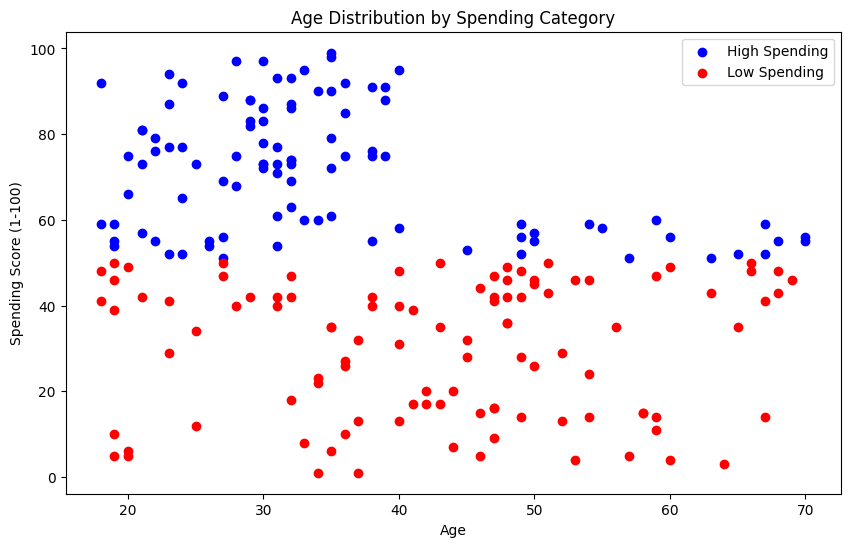

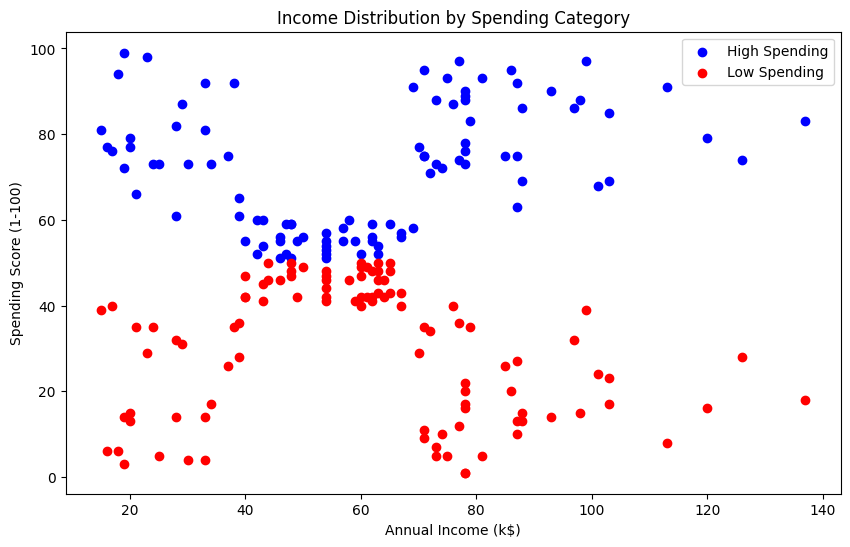

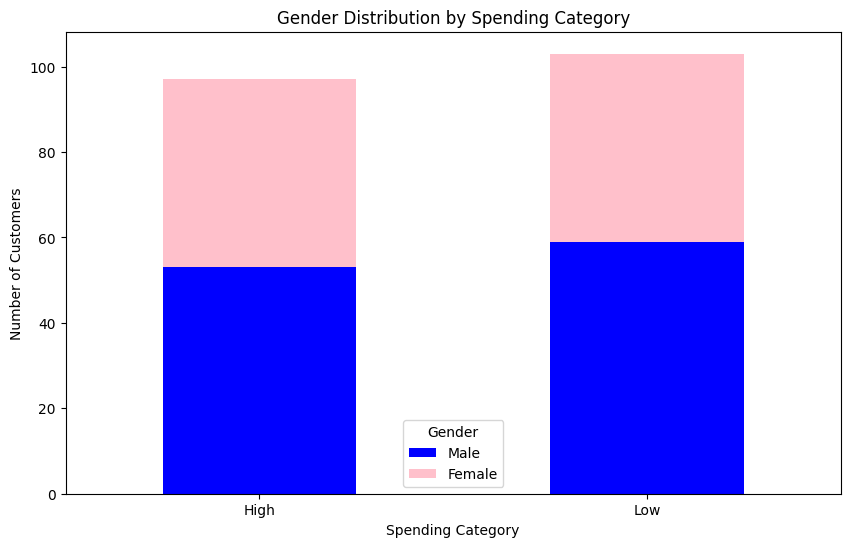

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df = df.rename(columns={
    'Annual Income (k$)': 'AnnIncome',
    'Spending Score (1-100)': 'SpendScore'
})

median_spend_score = df['SpendScore'].median()
df['SpendingCategory'] = ['High' if score > median_spend_score else 'Low' for score in df['SpendScore']]

plt.figure(figsize=(10, 6))
plt.scatter(df[df['SpendingCategory'] == 'High']['Age'], 
            df[df['SpendingCategory'] == 'High']['SpendScore'], 
            color='blue', label='High Spending')
plt.scatter(df[df['SpendingCategory'] == 'Low']['Age'], 
            df[df['SpendingCategory'] == 'Low']['SpendScore'], 
            color='red', label='Low Spending')
plt.title('Age Distribution by Spending Category')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df[df['SpendingCategory'] == 'High']['AnnIncome'], 
            df[df['SpendingCategory'] == 'High']['SpendScore'], 
            color='blue', label='High Spending')
plt.scatter(df[df['SpendingCategory'] == 'Low']['AnnIncome'], 
            df[df['SpendingCategory'] == 'Low']['SpendScore'], 
            color='red', label='Low Spending')
plt.title('Income Distribution by Spending Category')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

gender_spending_group = pd.crosstab(df['SpendingCategory'], df['Gender'])
gender_spending_group.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink'])

plt.title('Gender Distribution by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


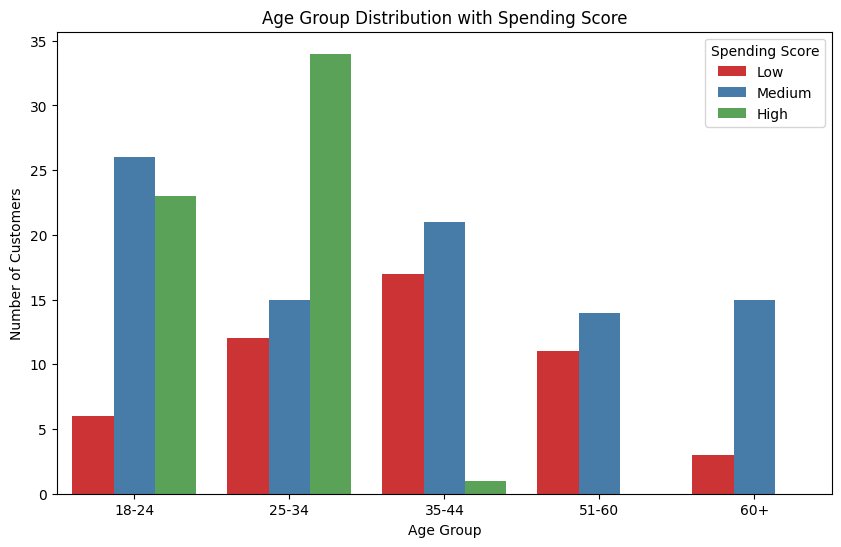

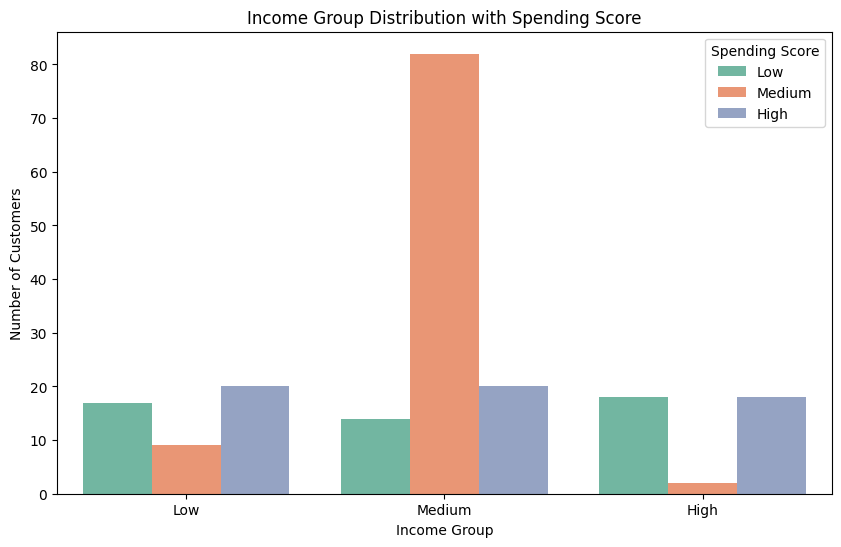

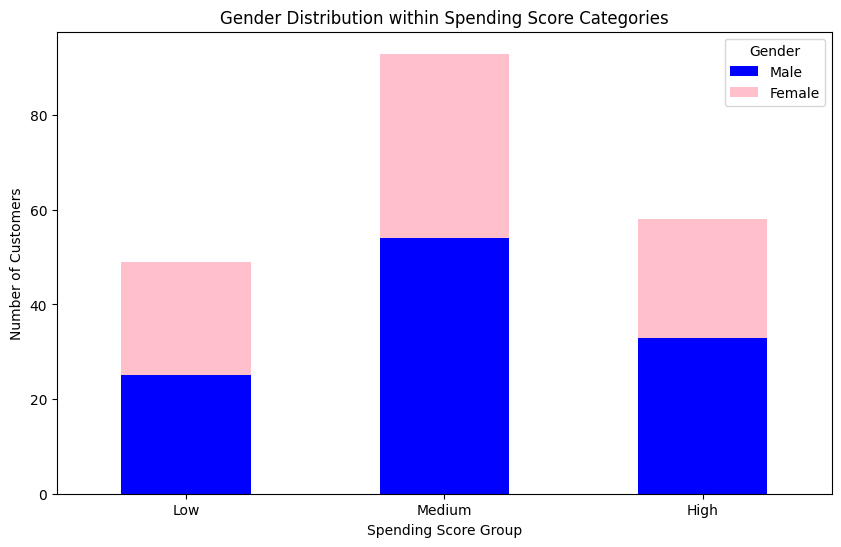

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df = df.rename(columns={
    'Annual Income (k$)': 'AnnIncome',
    'Spending Score (1-100)': 'SpendScore'
})

age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-24', '25-34', '35-44', '51-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

income_bins = [0, 40, 80, 140]
income_labels = ['Low', 'Medium', 'High']
df['IncomeGroup'] = pd.cut(df['AnnIncome'], bins=income_bins, labels=income_labels, right=False)

spending_bins = [0, 33, 66, 100]
spending_labels = ['Low', 'Medium', 'High']
df['SpendGroup'] = pd.cut(df['SpendScore'], bins=spending_bins, labels=spending_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='SpendGroup', palette='Set1')
plt.title('Age Group Distribution with Spending Score')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Score', loc='upper right')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IncomeGroup', hue='SpendGroup', palette='Set2')
plt.title('Income Group Distribution with Spending Score')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Score', loc='upper right')
plt.show()


spending_gender_group = pd.crosstab(df['SpendGroup'], df['Gender'])
spending_gender_group.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink'])

plt.title('Gender Distribution within Spending Score Categories')
plt.xlabel('Spending Score Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()



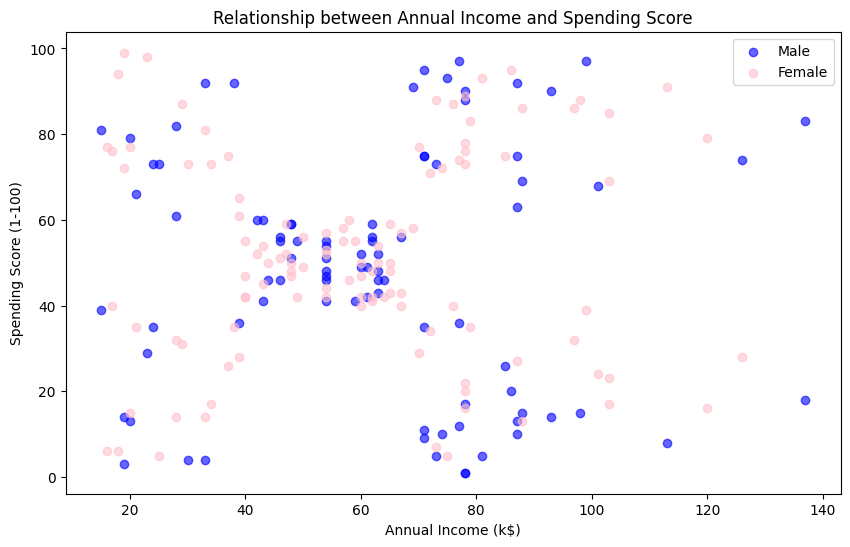

Correlation between Annual Income and Spending Score: 0.01
The correlation is weak or close to zero, which suggests that income does not strongly affect spending behavior.


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')

df = df.rename(columns={
    'Annual Income (k$)': 'AnnIncome',
    'Spending Score (1-100)': 'SpendScore'
})
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Gender'] == 'Male']['AnnIncome'], 
            df[df['Gender'] == 'Male']['SpendScore'], 
            color='blue', label='Male', alpha=0.6)
plt.scatter(df[df['Gender'] == 'Female']['AnnIncome'], 
            df[df['Gender'] == 'Female']['SpendScore'], 
            color='pink', label='Female', alpha=0.6)
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

correlation = df['AnnIncome'].corr(df['SpendScore'])
print(f"Correlation between Annual Income and Spending Score: {correlation:.2f}")

if correlation > 0.5:
    print("There is a strong positive correlation between annual income and spending score. This suggests that higher income is associated with higher spending.")
elif correlation < -0.5:
    print("There is a strong negative correlation between annual income and spending score. This suggests that higher income is associated with lower spending.")
else:
    print("The correlation is weak or close to zero, which suggests that income does not strongly affect spending behavior.")